In [222]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
%matplotlib inline

# IMPORT DATASETS

IMDB,TM,TN

In [2]:
# connect IMDB
con =sqlite3.connect('zippedData/im.db')

In [3]:
# IMDB READ

df_IMDB = pd.read_sql("""
SELECT b.primary_title AS title,b.genres AS genres,r.averagerating AS ratings,r.numvotes AS votes,b.start_year
FROM movie_ratings AS r
LEFT JOIN movie_basics AS b
ON r.movie_id = b.movie_id
ORDER BY ratings DESC
""",con)
df_IMDB.head()

,title,genres,ratings,votes,start_year
0,The Paternal Bond: Barbary Macaques,Documentary,10.0,5,2015
1,Requiem voor een Boom,Documentary,10.0,5,2016
2,Freeing Bernie Baran,"Crime,Documentary",10.0,5,2010
3,Hercule contre Hermès,Documentary,10.0,5,2012
4,Pick It Up! - Ska in the '90s,Documentary,10.0,5,2019


In [4]:
df_tn = pd.read_csv('zippedData/tn.movie_budgets.csv')
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
df_TM = pd.read_csv('zippedData/tmdb.movies.csv')
df_TM

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


# COMBINE DATASETS

df <br>
IMDB + TN + TM <br>
2000+ movies

dfl <br>
(df LARGE) <br>
IMDB + TM <br>
23000+ movies

In [6]:
df = pd.merge(df_IMDB,df_TM,how='inner',left_on='title',right_on='title')

In [7]:
df = df.drop_duplicates()

In [8]:
df = df.merge(df_tn,left_on='title',right_on='movie')

In [9]:
df = df.drop_duplicates(subset='title')

In [10]:
df.sample(5)

,title,genres,ratings,votes,start_year,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
2881,The Meg,"Action,Horror,Sci-Fi",5.7,114042,2018,23836,"[28, 878, 53, 27]",345940,en,The Meg,31.397,2018-08-10,5.9,2896,94,"Aug 10, 2018",The Meg,"$178,000,000","$145,443,742","$529,530,715"
3080,Zookeeper,"Comedy,Family,Romance",5.2,52396,2011,2598,"[35, 10749, 10751]",38317,en,Zookeeper,10.764,2011-07-08,5.3,886,71,"Jul 8, 2011",Zookeeper,"$80,000,000","$80,360,866","$170,805,525"
2717,Slender Man,"Adventure,Comedy,Horror",5.9,32,2013,23932,"[9648, 53, 27]",439015,en,Slender Man,16.999,2018-08-10,4.0,712,80,"Aug 10, 2018",Slender Man,"$10,000,000","$30,564,825","$51,723,644"
3294,Devil's Due,"Horror,Mystery,Thriller",4.1,15502,2014,11553,[27],79316,en,Devil's Due,5.893,2014-01-17,4.5,303,14,"Jan 17, 2014",Devil's Due,"$7,000,000","$15,821,461","$36,146,087"
1843,Escape Plan,"Action,Crime,Mystery",6.7,211587,2013,7901,"[28, 53]",107846,en,Escape Plan,17.880,2013-10-18,6.7,2799,37,"Oct 18, 2013",Escape Plan,"$70,000,000","$25,135,965","$103,735,965"


In [11]:
dfl = pd.merge(df_IMDB,df_TM,how='inner',left_on='title',right_on='title')

In [12]:
dfl.sample(5)

,title,genres,ratings,votes,start_year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
17309,ChickLit,Comedy,4.6,337,2016,18471,[35],334893,en,ChickLit,2.185,2016-09-23,6.6,5
19619,The Invoking,"Horror,Thriller",2.8,980,2013,8751,"[27, 53]",192023,en,The Invoking,2.481,2013-03-16,4.1,14
930,Yellow,Drama,5.6,255,2012,17088,[],448293,en,Yellow,0.600,2015-09-01,5.0,1
3734,Mirage,"Drama,Mystery,Romance",7.5,17318,2018,23931,"[878, 53, 18, 10749]",529216,es,Durante la tormenta,17.172,2018-06-14,7.6,452
8637,Faust,"Drama,Fantasy,Mystery",6.6,4731,2011,2999,"[14, 18]",77560,de,Faust,4.943,2011-11-15,6.9,69


# DATA CLEANING

### df data cleaning

In [13]:
df = df[['title','genres','ratings','votes','release_date_x','production_budget','worldwide_gross']]

In [14]:
df = df.dropna()

In [15]:
df.sample(5)

,title,genres,ratings,votes,release_date_x,production_budget,worldwide_gross
1617,Widows,"Crime,Drama,Thriller",7.0,61615,2018-11-16,"$40,000,000","$73,866,088"
1978,Sound of My Voice,"Drama,Mystery,Sci-Fi",6.6,19387,2011-01-22,"$135,000","$429,448"
64,Skin Trade,Documentary,8.8,31,2014-11-07,"$9,000,000","$1,242"
1432,Snowpiercer,"Action,Drama,Sci-Fi",7.1,239264,2014-06-27,"$40,000,000","$88,069,880"
3350,Wings,"Adventure,Animation,Comedy",3.2,561,2013-08-05,"$2,000,000",$0


In [16]:
df['genres'] = df['genres'].apply(lambda x: x.split(','))

In [17]:
df

,title,genres,ratings,votes,release_date_x,production_budget,worldwide_gross
0,Crossroads,[Documentary],9.3,22,2017-10-14,"$12,000,000","$57,000,000"
12,The Runaways,[Adventure],9.2,47,2010-03-19,"$9,500,000","$5,278,632"
14,The Wall,[Documentary],9.2,8,2013-06-07,"$3,000,000","$4,495,262"
22,Survivor,"[Biography, Crime, Documentary]",9.0,45,2012-08-29,"$20,000,000","$1,703,281"
28,Frankenstein,[Drama],9.0,1832,2015-08-15,"$45,000,000","$112,006,296"
...,...,...,...,...,...,...,...
3356,Red River,[Horror],2.3,179,2011-05-05,"$3,000,000","$9,012,000"
3357,Snow White: A Deadly Summer,[Horror],2.2,679,2012-03-16,"$1,000,000",$0
3358,United Passions,"[Drama, History, Sport]",2.1,3878,2015-06-05,"$30,000,000","$168,832"
3359,Foodfight!,"[Action, Animation, Comedy]",1.9,8248,2013-05-07,"$45,000,000","$73,706"


In [18]:
df['genres'] = df['genres'].map(lambda x: random.choice(x))

In [19]:
objects_to_floats = ['production_budget','worldwide_gross']

for x in objects_to_floats:
    df[x] = df[x].str.replace('$',"")
    df[x] = df[x].str.replace(',',"")

In [20]:
df['genres'] = df['genres'].astype('category')

In [21]:
df['production_budget'] = df['production_budget'].astype('float')

In [22]:
# turn the budget to million
df['production_budget'] = df['production_budget']/1000000

In [23]:
df.rename(columns = {'production_budget':'production_budget_million'}, inplace = True)

In [24]:
df

,title,genres,ratings,votes,release_date_x,production_budget_million,worldwide_gross
0,Crossroads,Documentary,9.3,22,2017-10-14,12.0,57000000
12,The Runaways,Adventure,9.2,47,2010-03-19,9.5,5278632
14,The Wall,Documentary,9.2,8,2013-06-07,3.0,4495262
22,Survivor,Biography,9.0,45,2012-08-29,20.0,1703281
28,Frankenstein,Drama,9.0,1832,2015-08-15,45.0,112006296
...,...,...,...,...,...,...,...
3356,Red River,Horror,2.3,179,2011-05-05,3.0,9012000
3357,Snow White: A Deadly Summer,Horror,2.2,679,2012-03-16,1.0,0
3358,United Passions,History,2.1,3878,2015-06-05,30.0,168832
3359,Foodfight!,Animation,1.9,8248,2013-05-07,45.0,73706


In [25]:
df['worldwide_gross'] = df['worldwide_gross'].astype('float')

In [26]:
df['release_date_x'] = pd.to_datetime(df['release_date_x'] )

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1775 entries, 0 to 3360
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   title                      1775 non-null   object        
 1   genres                     1775 non-null   category      
 2   ratings                    1775 non-null   float64       
 3   votes                      1775 non-null   int64         
 4   release_date_x             1775 non-null   datetime64[ns]
 5   production_budget_million  1775 non-null   float64       
 6   worldwide_gross            1775 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 99.6+ KB


### dfl data cleaning

In [28]:
dfl = dfl.drop_duplicates()

In [29]:
dfl = dfl.dropna()

In [30]:
dfl = dfl[['title','genres','ratings','votes','release_date']]

In [31]:
dfl['genres'] = dfl['genres'].apply(lambda x: x.split(','))

In [32]:
dfl['genres'] = dfl['genres'].map(lambda x: random.choice(x))

In [33]:
dfl = dfl.drop_duplicates()

In [34]:
dfl['release_date'] = pd.to_datetime(dfl['release_date'] )

In [35]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19258 entries, 0 to 19948
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         19258 non-null  object        
 1   genres        19258 non-null  object        
 2   ratings       19258 non-null  float64       
 3   votes         19258 non-null  int64         
 4   release_date  19258 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 902.7+ KB


In [36]:
dfl.head()

,title,genres,ratings,votes,release_date
0,A Mediocre Documentary with Tom And Dan,Comedy,9.8,5,2018-05-03
1,Love on a Leash,Family,9.7,25,2013-08-13
2,Love on a Leash,Documentary,9.7,25,2013-08-13
3,Finger of God 2,Documentary,9.5,8,2018-12-04
4,"Hare Krishna! The Mantra, the Movement and the...",Documentary,9.5,829,2017-06-16


# DATA FILTER

In [37]:
df = df[(df['release_date_x'] >= '2010-01-01') & (df['release_date_x'] <= '2018-12-31')]

In [38]:
dfl = dfl[(dfl['release_date'] >= '2010-01-01') & (dfl['release_date'] <= '2018-12-31')]

In [39]:
dfl_genre_counts = dfl.groupby(by='genres')['genres'].count().sort_values(ascending=False).to_frame()

In [40]:
dfl_ratings = dfl[['genres','ratings']]

In [41]:
dfl_ratings.groupby('genres').mean().sort_values(by='ratings',ascending=False)

,ratings
genres,
News,7.242187
Documentary,7.073583
Biography,6.962640
History,6.866031
Music,6.848020
Sport,6.591139
Musical,6.336765
Drama,6.173318
War,6.133333


# TIME TO PLOT!

### df

C:\Users\qwswe\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\qwswe\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\qwswe\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\qwswe\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


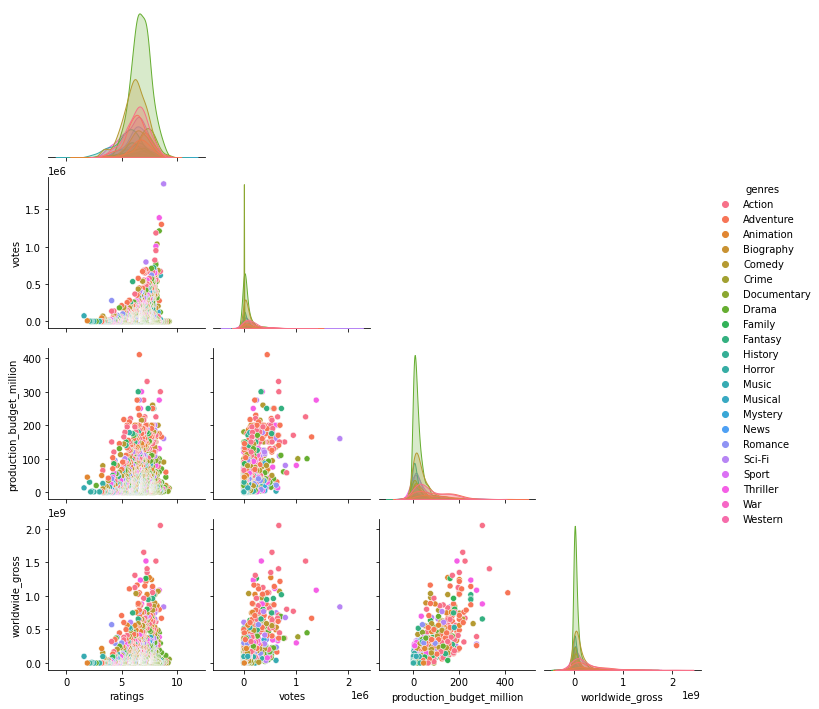

In [42]:
sns.pairplot(df, hue = 'genres', corner = True);

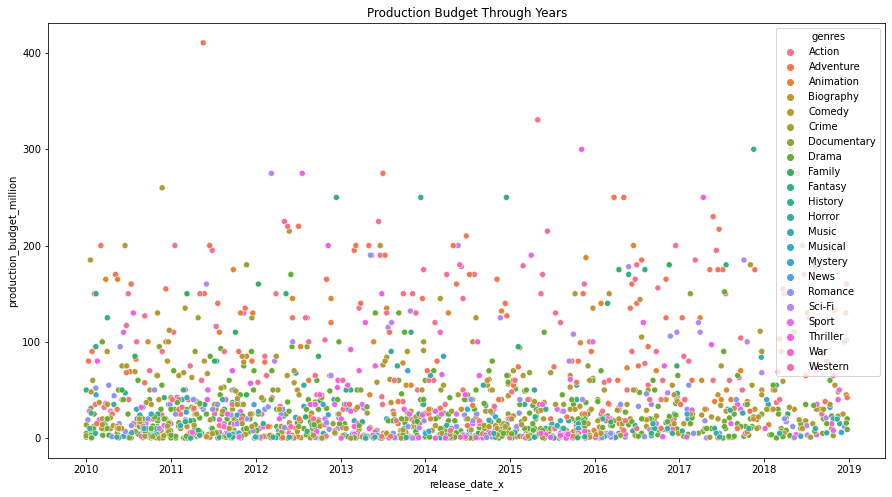

In [43]:
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'release_date_x', y = 'production_budget_million', hue = 'genres', data = df, ax = ax)
ax.set_title('Production Budget Through Years');

# no trend?

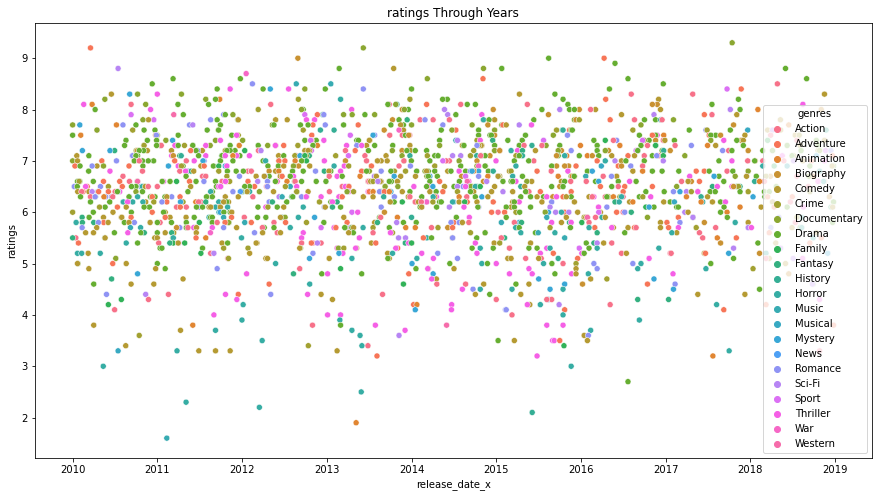

In [44]:
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'release_date_x', y = 'ratings', hue = 'genres', data = df, ax = ax)
ax.set_title('ratings Through Years');

# no trend?

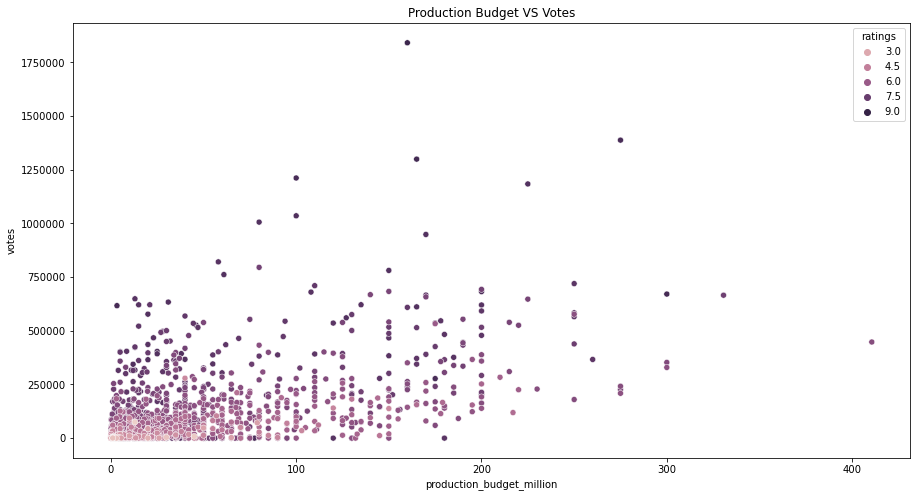

In [45]:
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'production_budget_million', y = 'votes', hue = 'ratings', data = df, ax = ax)
ax.set_title('Production Budget VS Votes')
ax.ticklabel_format(useOffset=False,style='plain');

# jeff got this

# FINAL PLOTS
1 market share <br>
2 reputation: weighted ratings vs votes <br>
3 by season

### 1 MARKET SHARE

In [99]:
df_ratings_votes_budgets_f = dfl_genre_counts.sort_index().merge(df_ratings_votes_budgets.groupby('genres')['profit'].mean(),left_index=True, right_index=True
)

In [102]:
df_ratings_votes_budgets_f.columns = ['counts','profits']

In [106]:
df_ratings_votes_budgets_f = df_ratings_votes_budgets_f.sort_values('counts',ascending=False)

In [108]:
df_ratings_votes_budgets_f
# done

,counts,profits
genres,,
Drama,4861,5.349146e+07
Documentary,2434,4.117548e+07
Comedy,2245,1.154301e+08
Horror,1799,4.079166e+07
Thriller,1795,1.154573e+08
Action,991,2.538497e+08
Romance,791,6.703365e+07
Crime,653,7.003966e+07
Adventure,489,2.993468e+08


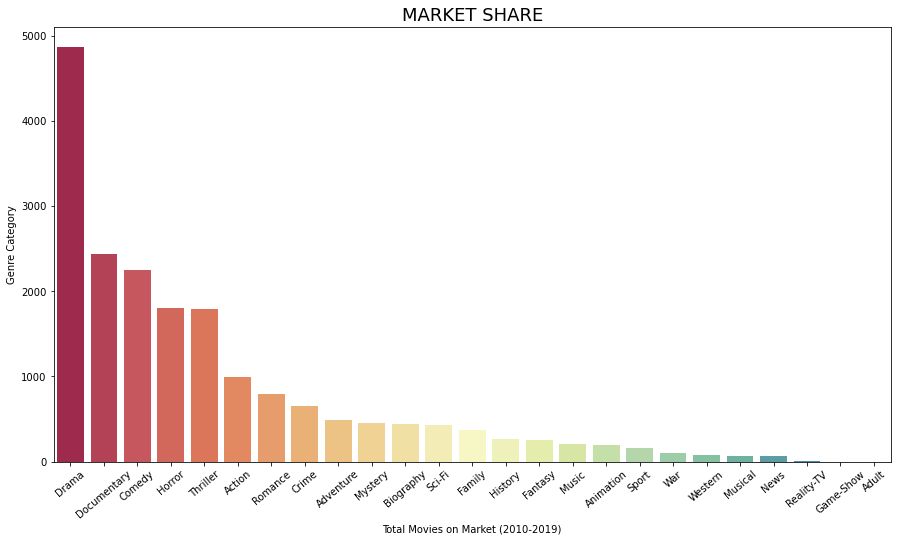

In [71]:
fig,ax = plt.subplots(figsize=(15,8))
sns.set_palette("Set1", 8, .75)
sns.barplot(x = dfl_genre_counts.index, y = 'genres',palette='Spectral', data = dfl_genre_counts, ax = ax)
ax.set_title('MARKET SHARE',fontsize = 18)
ax.set_xlabel('Total Movies on Market (2010-2019)')
ax.set_ylabel('Genre Category')
plt.xticks(rotation = 40);

# help to downsize/filter

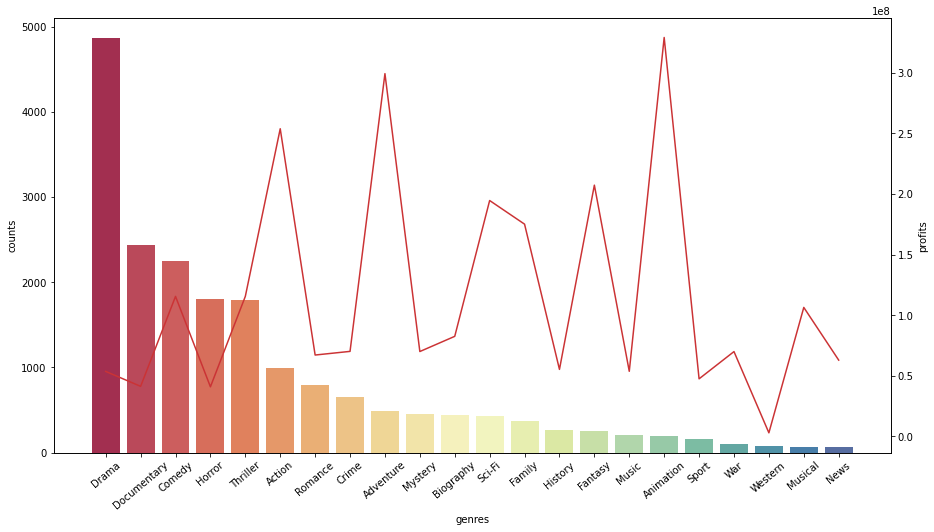

In [130]:
# try to add a lineplot

fig,ax1 = plt.subplots(figsize=(15,8))
sns.set_palette("Set1", 8, .75)
sns.barplot(x = df_ratings_votes_budgets_f.index, y = 'counts',palette='Spectral', data = df_ratings_votes_budgets_f, ax = ax1)
ax.set_title('MARKET SHARE',fontsize = 18)
ax.set_xlabel('Total Movies on Market (2010-2019)')
ax.set_ylabel('Genre Category')
plt.xticks(rotation = 40)

ax2 = ax1.twinx()
sns.lineplot(y = 'profits', x = df_ratings_votes_budgets_f.index, data = df_ratings_votes_budgets_f, palette='Blues', ax = ax2);
# help to downsize/filter

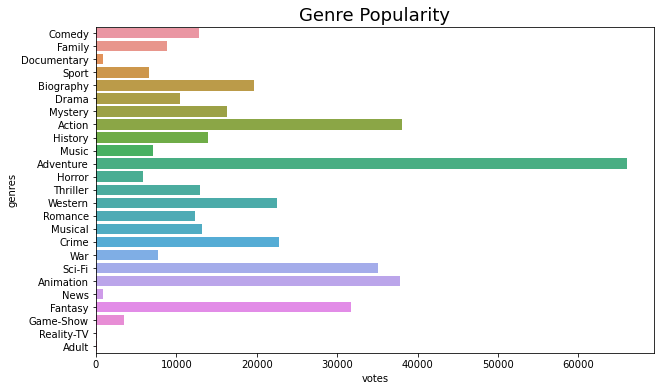

In [65]:
# which genre gets more votes/popularity

fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(x = 'votes', y = 'genres', ci=None, data = dfl, ax = ax)
ax.set_title('Genre Popularity',fontsize = 18);

# pick action? 
# jeff got similar plot, so no recommendation on my plot

### 2 Reputation
(weighted)ratings vs votes

In [48]:
# try to calculate weighted ratings
# dfl['sum_ratings'] = dfl['ratings'] * dfl['votes']

In [49]:
# dflg = dfl.groupby('genres').sum()
# dflg['weight_avg_rating'] = dflg['sum_ratings'] / dflg['votes']

In [50]:
# easy solution to get the average ratings and votes
dflg = dfl.groupby('genres').mean()

In [83]:
df_ratings_votes_budgets = df[['genres','ratings','votes','production_budget_million','worldwide_gross']]
df_ratings_votes_budgets['profit'] = df_ratings_votes_budgets['worldwide_gross'] - df_ratings_votes_budgets['production_budget_million']


<ipython-input-83-2ea806a1188f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratings_votes_budgets['profit'] = df_ratings_votes_budgets['worldwide_gross'] - df_ratings_votes_budgets['production_budget_million']


,genres,ratings,votes,production_budget_million,worldwide_gross,profit
0,Documentary,9.3,22,12.0,57000000.0,56999988.0
12,Adventure,9.2,47,9.5,5278632.0,5278622.5
14,Documentary,9.2,8,3.0,4495262.0,4495259.0
22,Biography,9.0,45,20.0,1703281.0,1703261.0
28,Drama,9.0,1832,45.0,112006296.0,112006251.0
...,...,...,...,...,...,...
3356,Horror,2.3,179,3.0,9012000.0,9011997.0
3357,Horror,2.2,679,1.0,0.0,-1.0
3358,History,2.1,3878,30.0,168832.0,168802.0
3359,Animation,1.9,8248,45.0,73706.0,73661.0


In [85]:
df_ratings_votes_budgets.groupby('genres').mean()

,ratings,votes,production_budget_million,worldwide_gross,profit
genres,,,,,
Action,6.337342,182774.563291,76.505063,2.538498e+08,2.538497e+08
Adventure,6.316129,164886.677419,95.559677,2.993468e+08,2.993468e+08
Animation,6.492157,107697.156863,87.303922,3.292076e+08,3.292076e+08
Biography,7.000000,108390.701754,25.007018,8.246286e+07,8.246284e+07
Comedy,6.149590,82556.561475,36.343456,1.154302e+08,1.154301e+08
Crime,6.459211,109377.157895,29.088105,7.003969e+07,7.003966e+07
Documentary,7.268919,2255.094595,19.587905,4.117550e+07,4.117548e+07
Drama,6.701229,68018.769042,20.201924,5.349148e+07,5.349146e+07
Family,6.158065,61542.161290,46.341935,1.750780e+08,1.750779e+08


In [217]:
sns.set_theme()

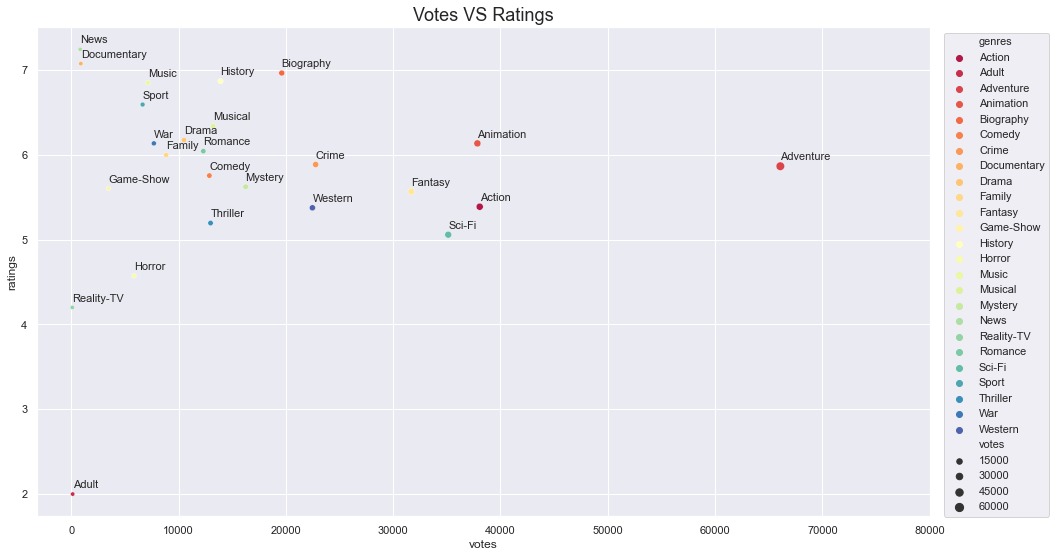

In [259]:
# votes/popularity VS ratings, hue with selected genres
# normal mean
# safe graph
# the scatter size is not changing that much

s_exp = [20*n**2 for n in range(len(dflg.index))]

fig,ax = plt.subplots(figsize=(16,9))
sns.scatterplot(x = 'votes', y = 'ratings', hue = 'genres', size = 'votes',
                palette='Spectral',data = dflg, ax = ax)
ax.set_title('Votes VS Ratings',fontsize = 18)
plt.xticks(np.arange(0,90000,10000))
ax.legend(bbox_to_anchor=(1.14, 1))

for i in range(dflg.shape[0]):
    plt.text(x = dflg.votes[i], y = dflg.ratings[i]+0.07, s = dflg.index[i],fontsize=11)

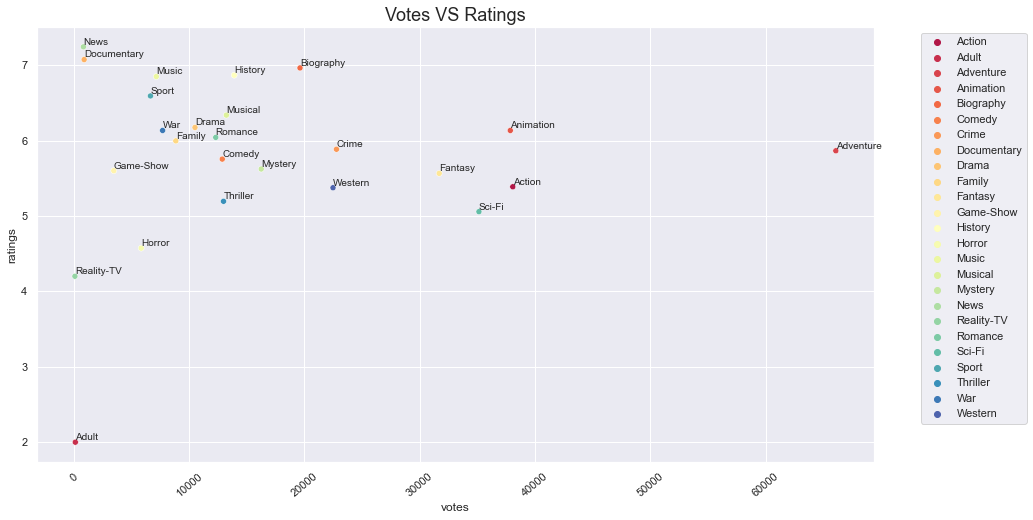

In [258]:
# votes/popularity VS ratings, hue with selected genres
# normal mean

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'votes', y = 'ratings', hue = 'genres', palette='Spectral',data = dflg, ax = ax)
ax.set_title('Votes VS Ratings',fontsize = 18)
plt.xticks(rotation = 40)
ax.legend(bbox_to_anchor=(1.05, 1))

for i in range(dflg.shape[0]):
    plt.text(x = dflg.votes[i], y = dflg.ratings[i]+0.03, s = dflg.index[i])


In [52]:
# dflg1 to calculate weighted ratings
dflg1 = dfl
dflg1

,title,genres,ratings,votes,release_date
0,A Mediocre Documentary with Tom And Dan,Comedy,9.8,5,2018-05-03
1,Love on a Leash,Family,9.7,25,2013-08-13
2,Love on a Leash,Documentary,9.7,25,2013-08-13
3,Finger of God 2,Documentary,9.5,8,2018-12-04
4,"Hare Krishna! The Mantra, the Movement and the...",Documentary,9.5,829,2017-06-16
...,...,...,...,...,...
19944,Captain Battle: Legacy War,War,1.3,369,2013-01-12
19945,Justin Bieber: Always Believing,Music,1.2,392,2013-01-01
19946,Hell at My Heels,Western,1.1,102,2011-01-01
19947,"Kidnapping, Caucasian Style",Comedy,1.1,335,2014-12-17


In [53]:
dflg1['ratings*votes'] = dflg1['ratings'] * dflg1['votes']

In [54]:
dfl_weighted_ratings = dflg1.groupby('genres').sum()

In [55]:
dfl_weighted_ratings['weighted_ratings'] = dfl_weighted_ratings['ratings*votes'] / dfl_weighted_ratings['votes']

In [56]:
dfl_weighted_ratings

,ratings,votes,ratings*votes,weighted_ratings
genres,,,,
Action,5338.2,37721005,256550600.8,6.801266
Adult,2.0,128,256.0,2.000000
Adventure,2867.6,32313300,230173146.4,7.123171
Animation,1183.7,7304797,54232487.7,7.424229
Biography,3112.3,8765906,65772549.5,7.503223
Comedy,12916.8,28892155,191574174.1,6.630664
Crime,3842.4,14871002,102008327.2,6.859546
Documentary,17217.1,2163814,15889603.5,7.343331
Drama,30008.5,51060166,364488034.4,7.138403


In [57]:
dfl.groupby('genres')['genres'].count().sort_values(ascending=False).head(10).index

Index(['Drama', 'Documentary', 'Comedy', 'Horror', 'Thriller', 'Action',
       'Romance', 'Crime', 'Adventure', 'Mystery'],
      dtype='object', name='genres')

In [58]:
dfl_weighted_ratings.index

Index(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object', name='genres')

In [59]:
# select top 10 genres in quantity

selected_genre = dfl.groupby('genres')['genres'].count().sort_values(ascending=False).head(10).index
dfl_weighted_ratings_selected = dfl_weighted_ratings[dfl_weighted_ratings.index.isin(selected_genre)]
type(dfl_weighted_ratings_selected)

pandas.core.frame.DataFrame

IndexError: index 10 is out of bounds for axis 0 with size 10

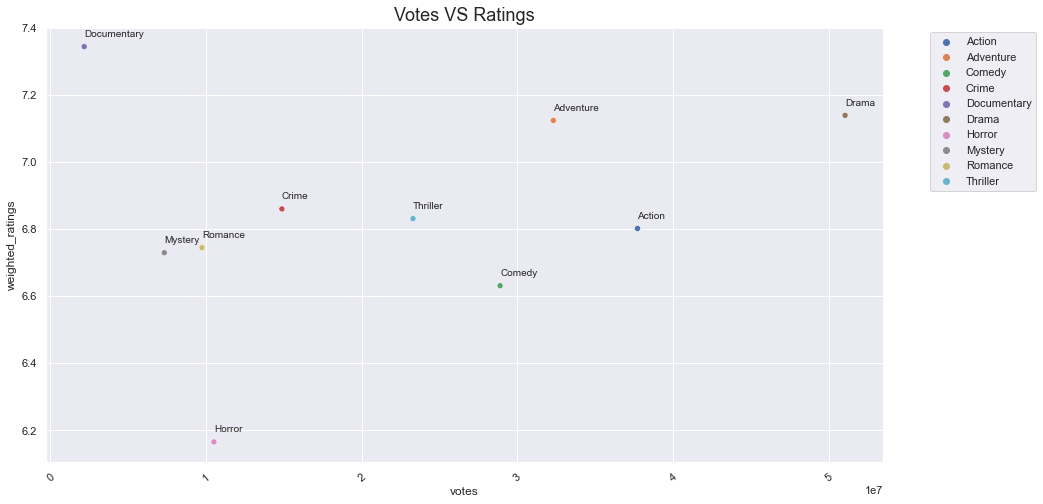

In [260]:
# votes/popularity VS ratings, hue with selected genres
# weighted ratings

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'votes', y = 'weighted_ratings', hue = dfl_weighted_ratings_selected.index, data = dfl_weighted_ratings_selected, ax = ax)
ax.set_title('Votes VS Ratings',fontsize = 18)
plt.xticks(rotation = 40)
ax.legend(bbox_to_anchor=(1.05, 1))

for i in range(dflg.shape[0]):
    plt.text(x = dfl_weighted_ratings_selected.votes[i], y = dfl_weighted_ratings_selected.weighted_ratings[i]+0.03, s = dfl_weighted_ratings_selected.index[i])

### 3.2 ratings vs votes with profits

In [283]:
dfl_ratings.head()

,genres,ratings
0,Comedy,9.8
1,Family,9.7
2,Documentary,9.7
3,Documentary,9.5
4,Documentary,9.5


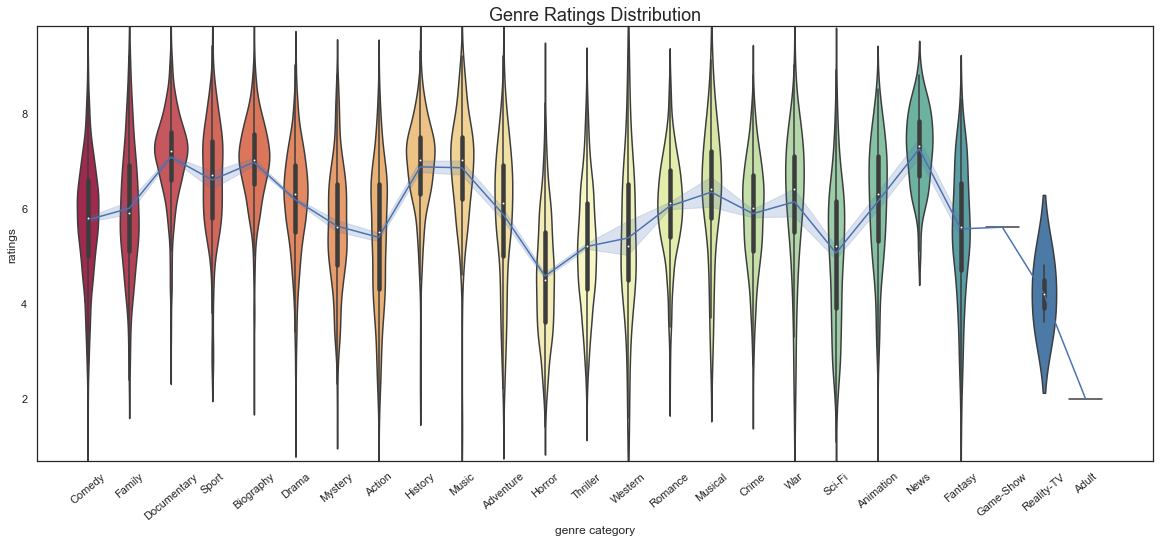

In [302]:
# safe graphy without profit line
sns.set_style("white")

fig,ax = plt.subplots(figsize=(20,8))

sns.violinplot(y = 'ratings', x = 'genres', data = dfl_ratings, palette='Spectral', ax = ax)
ax.set_title('Genre Ratings Distribution',fontsize = 18)
ax.set_xlabel('genre category')
ax.set_ylabel('ratings')
plt.xticks(rotation = 40)

sns.lineplot(y = 'ratings', x = 'genres', data = dfl_ratings, ax = ax);

# choose Documentary similar to Biography
# choose comedy?
# not Action, higher chance to get bad ratings

In [284]:
# now try to change the line to profit

In [288]:
df_ratings_votes_profits = df[['genres','ratings','votes','production_budget_million','worldwide_gross']]
df_ratings_votes_profits['profit'] = df_ratings_votes_profits['worldwide_gross'] - df_ratings_votes_profits['production_budget_million']

<ipython-input-288-d89ba23f4452>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratings_votes_profits['profit'] = df_ratings_votes_profits['worldwide_gross'] - df_ratings_votes_profits['production_budget_million']


In [292]:
df_ratings_votes_profits.drop(columns=['production_budget_million','worldwide_gross'])

,genres,ratings,votes,profit
0,Documentary,9.3,22,56999988.0
12,Adventure,9.2,47,5278622.5
14,Documentary,9.2,8,4495259.0
22,Biography,9.0,45,1703261.0
28,Drama,9.0,1832,112006251.0
...,...,...,...,...
3356,Horror,2.3,179,9011997.0
3357,Horror,2.2,679,-1.0
3358,History,2.1,3878,168802.0
3359,Animation,1.9,8248,73661.0


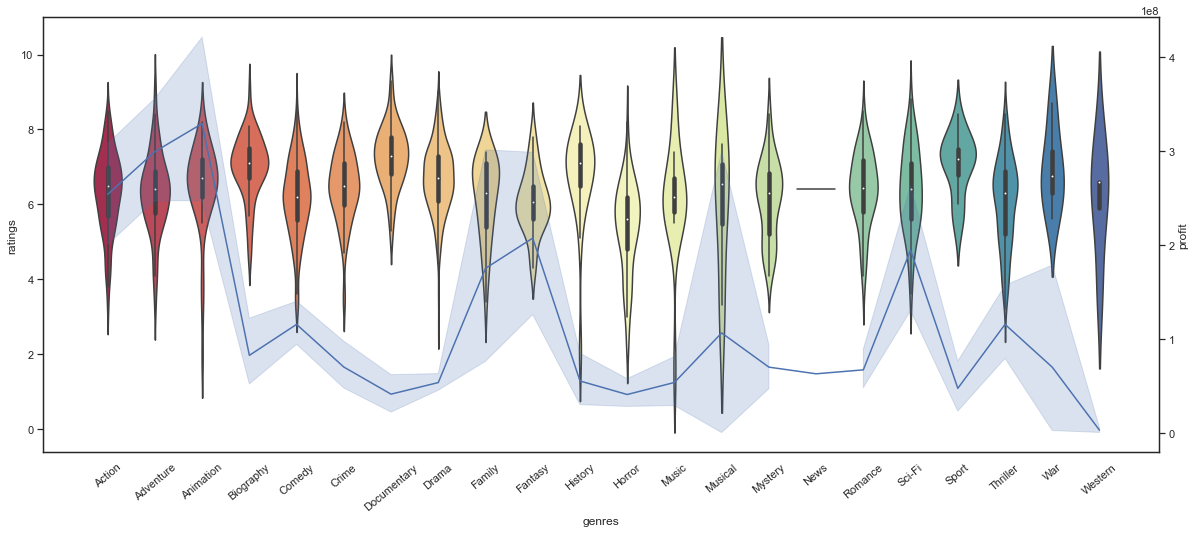

In [336]:
# use profit df instead

sns.set_style("white")

fig,ax1 = plt.subplots(figsize=(20,8))

sns.violinplot(y = 'ratings', x = 'genres', data = df_ratings_votes_profits, palette='Spectral', ax = ax1)
ax.set_title('Genre Ratings Distribution',fontsize = 18)
ax.set_xlabel('genre category')
ax.set_ylabel('ratings')
plt.xticks(rotation = 40)

ax2 = ax1.twinx()
sns.lineplot(y = 'profit', x = 'genres', data = df_ratings_votes_profits, ax = ax2);

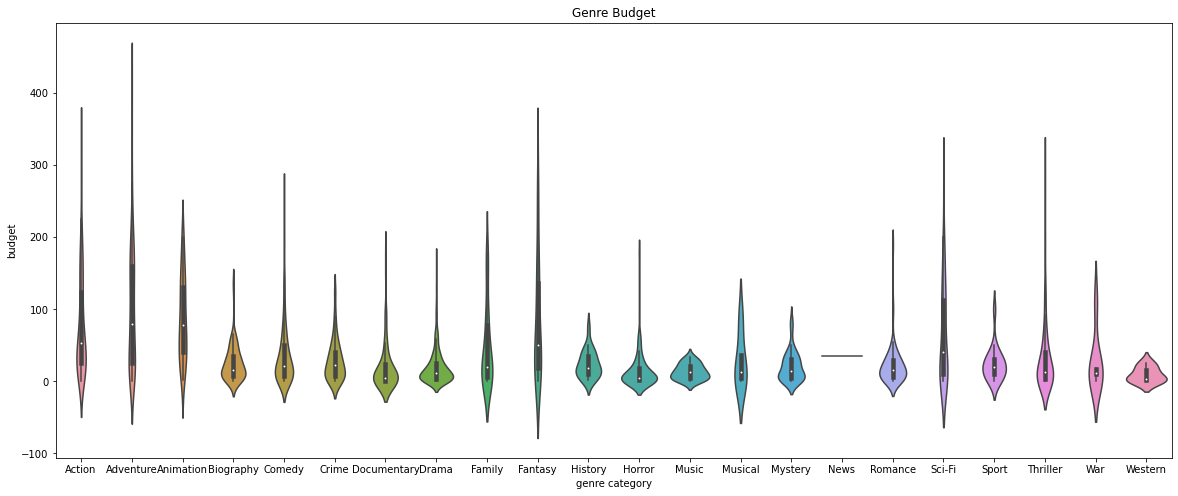

In [72]:
fig,ax = plt.subplots(figsize=(20,8))

sns.violinplot(y = 'production_budget_million', x = 'genres', data = df, ax = ax)
ax.set_title('Genre Budget')
ax.set_xlabel('genre category')
ax.set_ylabel('budget');

# Jeff got a better plot

In [ ]:
fig,ax = plt.subplots(figsize=(20,8))

sns.violinplot(y = 'worldwide_gross', x = 'genres', data = df, ax = ax, palette = customPalette)
ax.set_title('Genre Gross')
ax.set_xlabel('genre category')
ax.set_ylabel('Worldwide Gross');

# Jeff got this too

# TIME SERIES PLOT - TRENDS

In [318]:
selected_genre = ['Animation','Adventure','Sci-Fi','Drama','Action','Biography','Comedy']

In [319]:
# dfls means df - large dataset - selected genre
dfls = dfl[dfl['genres'].isin(selected_genre)]
dfls

,title,genres,ratings,votes,release_date,ratings*votes
0,A Mediocre Documentary with Tom And Dan,Comedy,9.8,5,2018-05-03,49.0
6,Standing Up,Biography,9.4,5,2013-08-16,47.0
7,Standing Up,Drama,7.0,2865,2013-08-16,20055.0
9,The Harvest,Drama,8.1,13,2013-10-19,105.3
14,Crossroads,Action,7.8,8,2017-10-14,62.4
...,...,...,...,...,...,...
19940,Bocadillo,Comedy,1.5,353,2018-10-12,529.5
19941,Shark Exorcist,Action,1.4,837,2016-06-24,1171.8
19943,Spyfall,Comedy,1.3,135,2014-08-27,175.5
19947,"Kidnapping, Caucasian Style",Comedy,1.1,335,2014-12-17,368.5


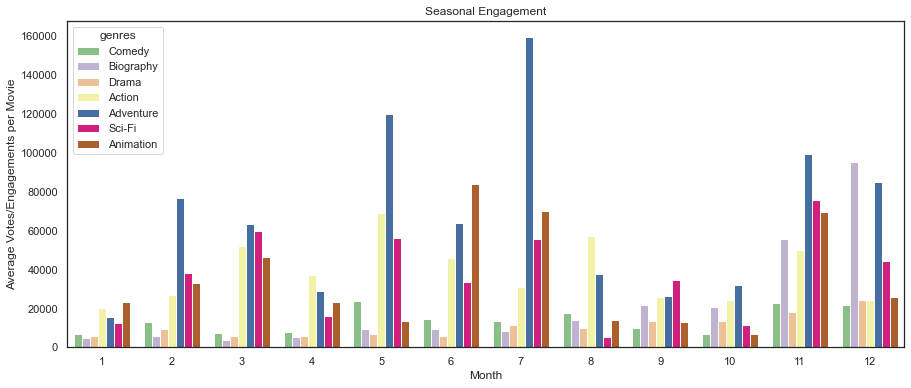

In [330]:
fig,ax = plt.subplots(figsize=(15,6))
sns.barplot(x = pd.DatetimeIndex(dfls.release_date).month, y = 'votes', hue = 'genres', palette='Accent', data = dfls, ci = None, ax = ax)
ax.set_title('Seasonal Engagement')
ax.set_xlabel('Month')
ax.set_ylabel('Average Votes/Engagements per Movie');

# 3 peaks
# adventure
# scifi
# biography
# off peak season

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
sns.barplot(x = pd.DatetimeIndex(dfls.release_date).month, y = 'ratings', hue = 'genres', data = dfls, ci = None, ax = ax)
ax.set_title('ratings trend in Different Month');

# some genre obviously get better ratings in certain month
# need to seperate to grids

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
sns.scatterplot(x = pd.DatetimeIndex(dfls.release_date).month, y = 'ratings', hue = 'genres', data = dfls, ci = None, ax = ax)
ax.set_title('ratings trend in Different Month');

# an attempt

In [ ]:
sns.relplot(x = pd.DatetimeIndex(dfls.release_date).month, y = 'ratings', col = 'genres',hue = 'genres', data = dfls)
ax.set_title('ratings trend in Different Month');

# attempts

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
sns.kdeplot(x = pd.DatetimeIndex(dfls.release_date).month, y = 'ratings', hue = 'genres', data = dfls, ax = ax)
ax.set_title('ratings trend in Different Month');

# no trend T T

In [ ]:
# dfs means df - budget dataset - selected genre
dfs = df[df['genres'].isin(selected_genre)]
dfs.genres.unique()

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
sns.barplot(x = pd.DatetimeIndex(dfs.release_date_x).month, y = 'production_budget_million', hue = 'genres', data = dfs, ci = None, ax = ax)
ax.set_title('Movie Budget in Different Month')
ax.legend(bbox_to_anchor=(1.05, 1));

# Movie in 

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'votes', y = 'ratings', hue = dflg.release, data = dfl, ax = ax)
ax.set_title('Votes VS Ratings',fontsize = 18)
plt.xticks(rotation = 40)
ax.legend(bbox_to_anchor=(1.05, 1))

for i in range(dflg.shape[0]):
    plt.text(x = dflg.votes[i], y = dflg.ratings[i]+0.03, s = dflg.index[i])